# Blinks preprocessing

In [5]:
import sys
sys.path.insert(0,"..") # this is not needed if you have installed pypillometry
import pypillometry as pp
import pylab as plt

In [ ]:
## get from url
pp.PupilData.from_shelve("")

In [ ]:
function blink_summary() returning blink-summary object (dict with some fancy plotting/displaying)

## Short, successive blinks

Some subjects blink in quick succession so that the eye almost immediately starts closing again once it opens from the previous blink. In that case, it is very difficult to define the onset and offset of such blink sequences.

Here is an example dataset recorded in our lab. We see a couple of "normal" blinks, as well as some fast sequences of sequential blinks (e.g., between seconds 131 and 134).

We can detect the blinks using the `detect_blinks()` function and see that each of the blinks is independently represented (red background).

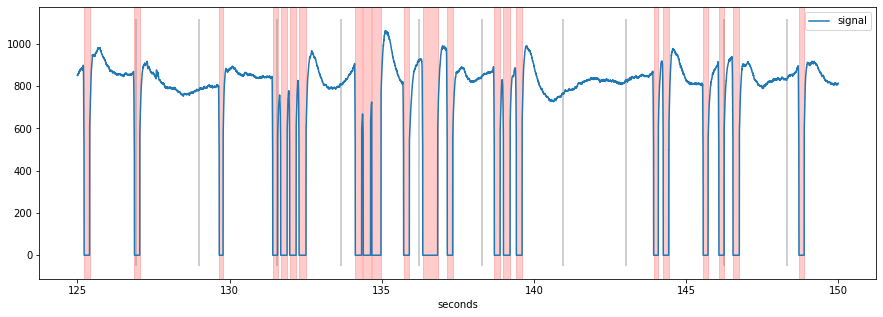

In [39]:
d=pp.PupilData.from_file("https://github.com/ihrke/pypillometry/raw/master/data/example_shortblinks.pd")
plt.figure(figsize=(15, 5))
d2=d.copy().detect_blinks()
d2.plot()

If we apply the blink-detection algorithm implemented in `blink_interp_mahot()`, bad things happen.

Here, we set the `margin` parameter to 50 ms which seems to be reasonable for this subject. With the `plot=True` parameter, we can generate diagnostic plots that give us an idea whether the procedure worked satisfactorily. We see immediately that the interpolation (red curve) gives reasonable results for isolated blinks (e.g., blink 2 and 3) but fails spectacularly for situations where there are surrounding blinks (e.g., blinks 8 and 9).

../pypillometry/pupildata.py:778: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


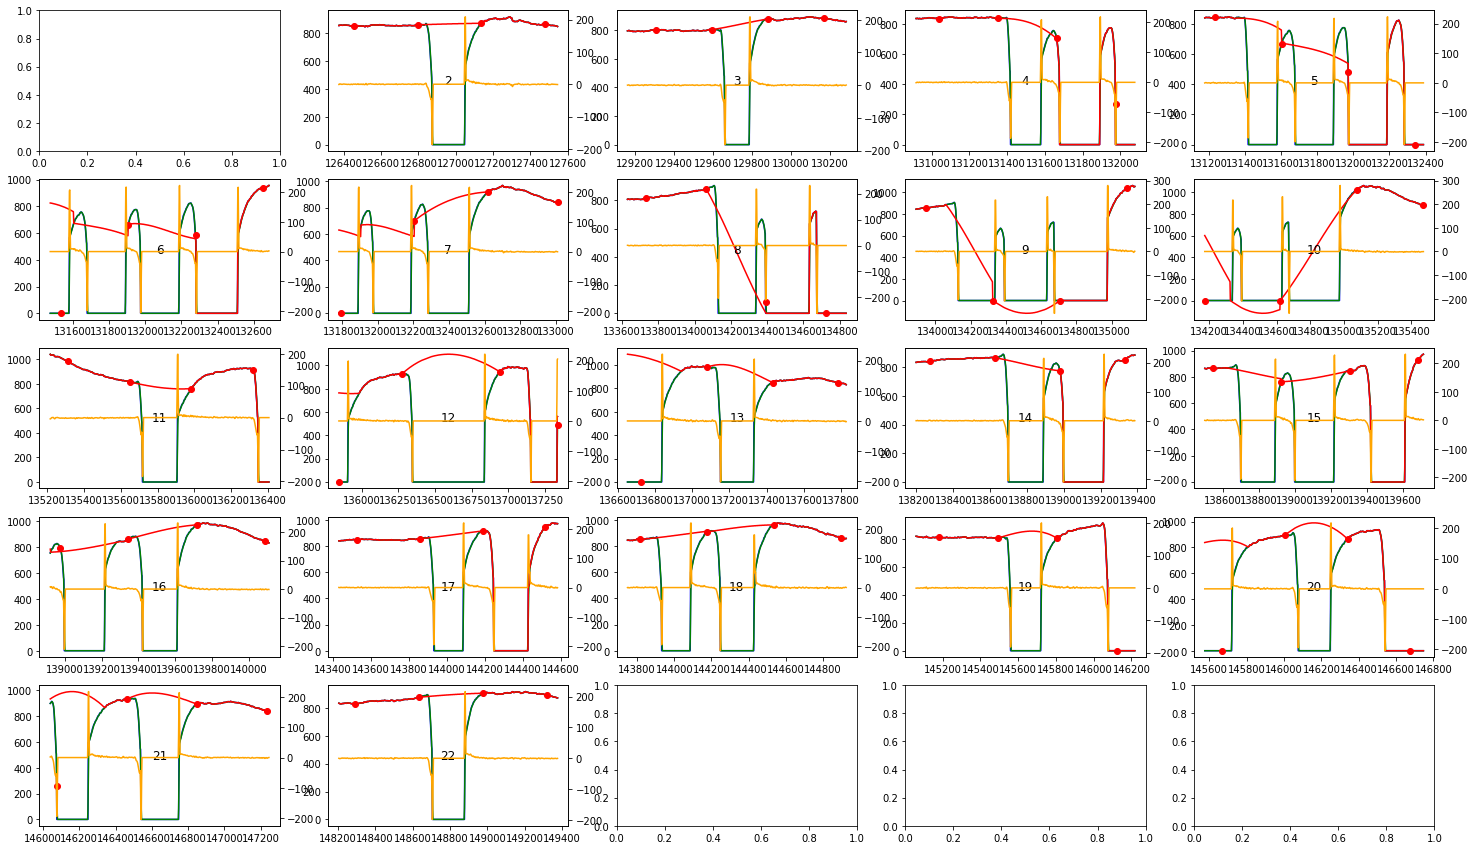

In [40]:
d2.blink_interp_mahot(margin=50, plot=True, plot_figsize=(25,15), plot_dim=(5,5));

We see the problem even better when plotting the interpolated and the raw signal on top of each other: The orange, interpolated signal shows spurious peaks and throughs because of the badly picked interpolation points in many cases.

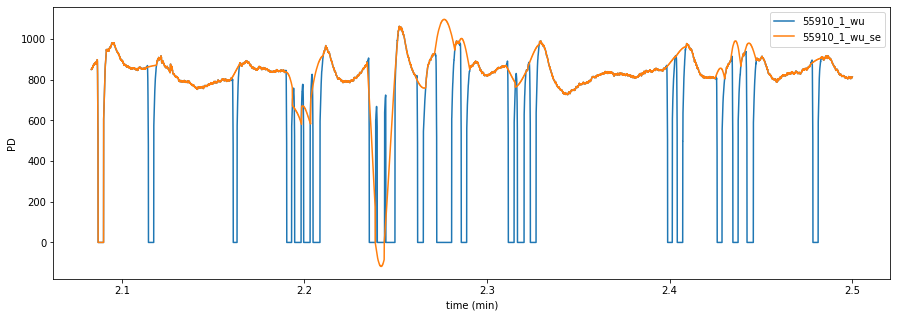

In [41]:
plt.figure(figsize=(15,5)); 
pp.plotpd(d,d2)

One solution to cope with this situation, is to merge together sequences of short blinks to one large blink.